# Noyau de densité

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import os
import seaborn as sns

In [2]:
Dossier = 'C:/Users/benji/Desktop/statapp'
Path=Dossier+'/driverssmooth/'

In [3]:
def Indentifiants_conducteurs(Dossier):
    Id_c=[]
    nb_trajet=[]

    for dirname, _, filenames in os.walk(Dossier):

        #on remplit la liste des identifiants
        if os.path.basename(dirname)=="" : 
            Id_c+=[os.path.basename(dirname)]
        else :
            Id_c+=[int(os.path.basename(dirname))]   

    # On enleve la premiere valeur de chaque liste
    Id_c = Id_c[1:]
    

    return (Id_c)

In [4]:
def nombre_trajetbis(idc):
    new_path = Path +'%i/' %idc
    for root, _, files in os.walk(new_path):
        return len(files)

In [20]:
def creation_heatmap():
    
    Id_conducteurs= Indentifiants_conducteurs(Path) #liste des identifiants des conducteurs
    Id_conducteurs.sort()
    Id_conducteurs = Id_conducteurs[200:len(Id_conducteurs)]
    
    
    for idc in Id_conducteurs:
        
        fichier =  Path + '%i' %idc + '/' 
        df = pd.read_csv(fichier + '1.csv',decimal=',')
        df.at[0,'a']= 0       #la première valeur de l'accélaration pour chaque trajet est un nan on remplace par 0
        
        for id_trajet in range(2,nombre_trajetbis(idc)-1): #on concatène en un seul dataframe tout les trajets d'un conducteur
                f=fichier + '%i' %id_trajet + '.csv'
                newdf= pd.read_csv(f, decimal=',')
                newdf.at[0,'a']= 0  #la première valeur de l'accélaration pour chaque trajet est un nan on remplace par 0
                df=pd.concat([newdf,df],ignore_index=True)
                df = df[df['v']>5]  #on élimine les vitesses en dessous de 5km/h
                df = df[abs(df['a'])<3] 
                
        trace(df,idc) #on trace la heatmap du conducteur

In [21]:
def trace(df,idc):
    
    vitesse = list(df['v'])
    acceleration = list(df['a'])
    
    #On créer la heatmap à partir de la fonction kdeplot qui calcul les noyaux de densités de nos points
    ax = sns.kdeplot(vitesse, acceleration,color='r', shade=True,cmap="Reds", shade_lowest=False)
    
    fig = ax.get_figure()
    nom_fig ='E:/heatmap' +  '/' + '%i' %idc + '.png'
    fig.savefig(nom_fig) #on enregistre la heatmap sous avec pour nom l'identifiant du conducteur

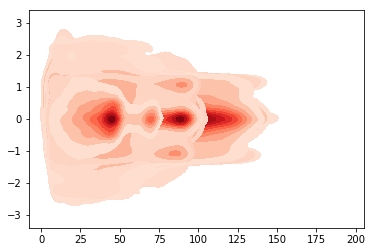

In [22]:
creation_heatmap()

# Représentation nuage de points

In [10]:
def tracer_nuage_point(df,idc):
    
    vitesse = list(df['v'])
    acceleration = list(df['a'])
    
    ax = sns.scatterplot(vitesse, acceleration,  marker="+")
    #sns.jointplot(vitesse, acceleration,kind = 'hex')
    

In [13]:
def creation_nuage_point():
    
    Id_conducteurs= [1] #liste des identifiants des conducteurs
    Id_conducteurs.sort()
    for idc in Id_conducteurs:
        
        fichier =  Path + '%i' %idc + '/' 
        df = pd.read_csv(fichier + '1.csv',decimal=',')
        df.at[0,'a']= 0       #la première valeur de l'accélaration pour chaque trajet est un nan on remplace par 0
        
        for id_trajet in range(2,nombre_trajetbis(idc)-1): #on concatène en un seul dataframe tout les trajets d'un conducteur
                f=fichier + '%i' %id_trajet + '.csv'
                newdf= pd.read_csv(f, decimal=',')
                newdf.at[0,'a']= 0  #la première valeur de l'accélaration pour chaque trajet est un nan on remplace par 0
                df=pd.concat([newdf,df],ignore_index=True)
                df = df[df['v']>5] 
                df = df[abs(df['a'])<3] 
                
        tracer_nuage_point(df,idc) #on trace le nuage de point des vitesses/accélération du conducteur

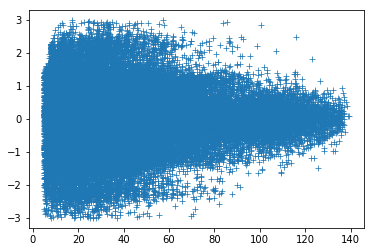

In [14]:
creation_nuage_point()

# Heatmap entre 5 et 60 km/h

In [8]:
def creation_heatmap2():
    
    Id_conducteurs= Indentifiants_conducteurs(Path) #liste des identifiants des conducteurs
    Id_conducteurs.sort()
    Id_conducteurs = Id_conducteurs[5:]
    
    
    for idc in Id_conducteurs:
        
        fichier =  Path + '%i' %idc + '/' 
        df = pd.read_csv(fichier + '1.csv',decimal=',')
        df.at[0,'a']= 0       #la première valeur de l'accélaration pour chaque trajet est un nan on remplace par 0
        
        for id_trajet in range(2,nombre_trajetbis(idc)-1): #on concatène en un seul dataframe tout les trajets d'un conducteur
                f=fichier + '%i' %id_trajet + '.csv'
                newdf= pd.read_csv(f, decimal=',')
                newdf.at[0,'a']= 0  #la première valeur de l'accélaration pour chaque trajet est un nan on remplace par 0
                df=pd.concat([newdf,df],ignore_index=True)
                df = df[df['v']>5]#on élimine les vitesses en dessous de 5km/h
                df = df[df['v']<40]
                df = df[abs(df['a'])<3] 
                
        trace2(df,idc) #on trace la heatmap du conducteur

In [9]:
def trace2(df,idc):
    
    vitesse = list(df['v'])
    acceleration = list(df['a'])
    
    #On créer la heatmap à partir de la fonction kdeplot qui calcul les noyaux de densités de nos points
    ax = sns.kdeplot(vitesse, acceleration,color='r', shade=True,cmap="Reds", shade_lowest=False)
    
    fig = ax.get_figure()
    nom_fig ='C:/Users/benji/Desktop/statapp/heatmap2' +  '/' + '%i' %idc + '.png'
    fig.savefig(nom_fig) #on enregistre la heatmap sous avec pour nom l'identifiant du conducteur

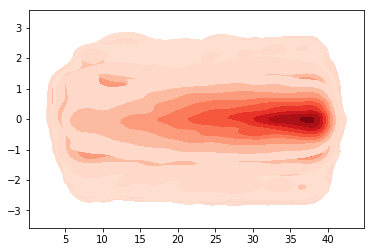

In [10]:
creation_heatmap2()